# Discrete Fourier Transform :-

# Plot of DFT and IDFT

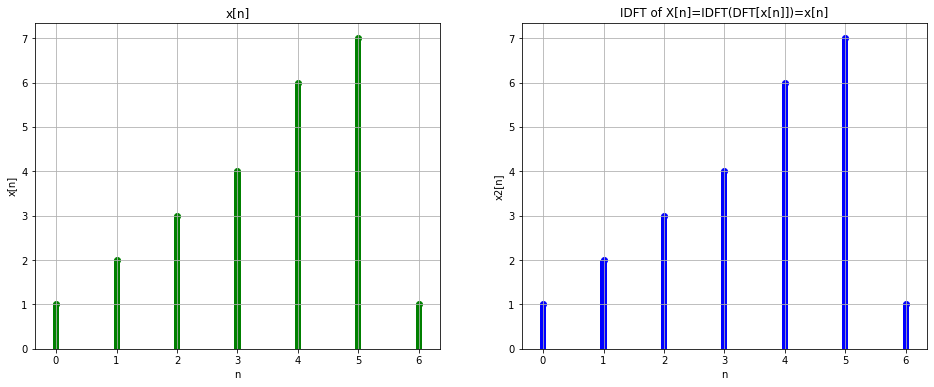

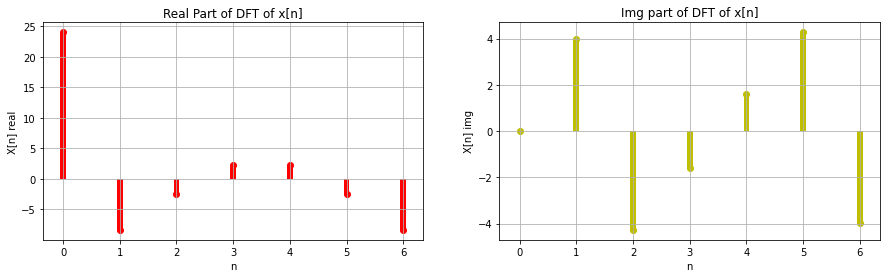

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
def DFT(s,M):
    S=[]
    for k in range(M):
        p=0
        for n in range(M):
            y=-2*np.pi*k*n/M
            exp=complex(np.cos(y),np.sin(y))
            p+=s[n]*exp
        S.append(p)
    return S
def IDFT(S,M):
    R=[]
    for n in range(M):
        p=0
        for k in range(M):
            y=2j*np.pi*k*n/M
            exp=np.exp(y)
            p+=S[k]*exp
        if p.imag<10**-4:
            p+=np.conj(p)
            p=p/2
        R.append(p/M)
    return R
x=np.array([1,2,3,4,6,7,1])
x2=np.empty([len(x)])
N=len(x)
n=np.arange(0,N,1)
X=np.empty([N])
X=DFT(x,N)
x2=IDFT(X,N)
fig=1
plt.figure(fig,figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(n,x,color='g')
plt.bar(n,x,color='g',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x[n]')
fig+=1
plt.subplot(1,2,2)
plt.scatter(n,x2,color='b')
plt.bar(n,x2,color='b',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('x2[n]')
plt.title('IDFT of X[n]=IDFT(DFT[x[n]])=x[n]')
plt.figure(fig,figsize=(15,4))
plt.subplot(1,2,1)
for i in range(len(X)):
    plt.scatter(i,X[i].real,color='r')
    plt.bar(i,X[i].real,color='r',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('X[n] real')
plt.title('Real Part of DFT of x[n]')
plt.subplot(1,2,2)
for i in range(len(X)):    
    plt.scatter(i,X[i].imag,color='y')
    plt.bar(i,X[i].imag,color='y',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('X[n] img')
plt.title('Img part of DFT of x[n]')
fig+=1
plt.show()

# circular Convolution

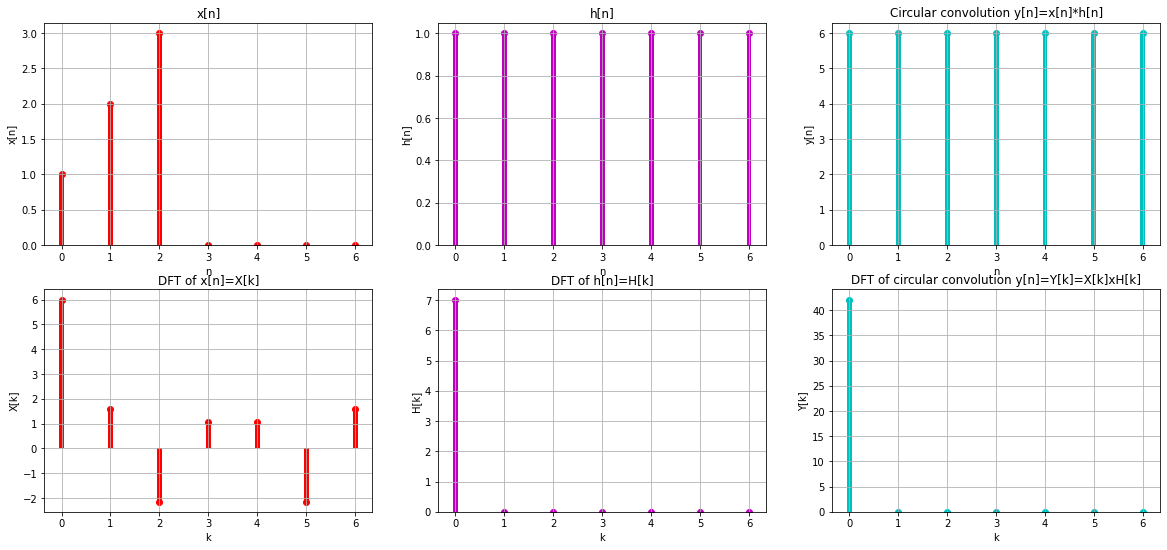

In [8]:
def circon(x,y):
    v=[]
    for m in range(len(x)):
        p=0
        for n in range(len(x)):
            if m>=n:
                p+=x[n]*y[m-n]
            else:
                p+=x[n]*y[m-n+len(x)]
        v.append(p)
    return v
x=np.array([1,2,3,0,0,0,0])
n=np.arange(0,len(x),1)
h=np.array([1,1,1,1,1,1,1])
y=circon(x,h)
X=DFT(x,len(x))
H=DFT(h,len(h))
Y=[]
for i in range(len(x)):
    Y.append(X[i]*H[i])
y2=IDFT(Y,len(Y))
plt.figure(fig,figsize=(20,9))
fig+=1
plt.subplot(2,3,1)
plt.scatter(n,x,color='r')
plt.bar(n,x,color='r',width=0.1)
plt.grid('True')
plt.title('x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.subplot(2,3,2)
plt.scatter(n,h,color='m')
plt.bar(n,h,color='m',width=0.1)
plt.title('h[n]')
plt.grid('True')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.subplot(2,3,3)
plt.scatter(n,y,color='c')
plt.title('Circular convolution y[n]=x[n]*h[n]')
plt.bar(n,y,color='c',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.subplot(2,3,4)
plt.scatter(n,X,color='r')
plt.bar(n,X,color='r',width=0.1)
plt.title('DFT of x[n]=X[k]')
plt.grid('True')
plt.xlabel('k')
plt.ylabel('X[k]')
plt.subplot(2,3,5)
plt.scatter(n,H,color='m')
plt.title('DFT of h[n]=H[k]')
plt.bar(n,H,color='m',width=0.1)
plt.grid('True')
plt.xlabel('k')
plt.ylabel('H[k]')
plt.subplot(2,3,6)
plt.scatter(n,Y,color='c')
plt.title('DFT of circular convolution y[n]=Y[k]=X[k]xH[k]')
plt.bar(n,Y,color='c',width=0.1)
plt.grid('True')
plt.xlabel('k')
plt.ylabel('Y[k]')
plt.show()

# DFT of x(t)=cos(2πft)

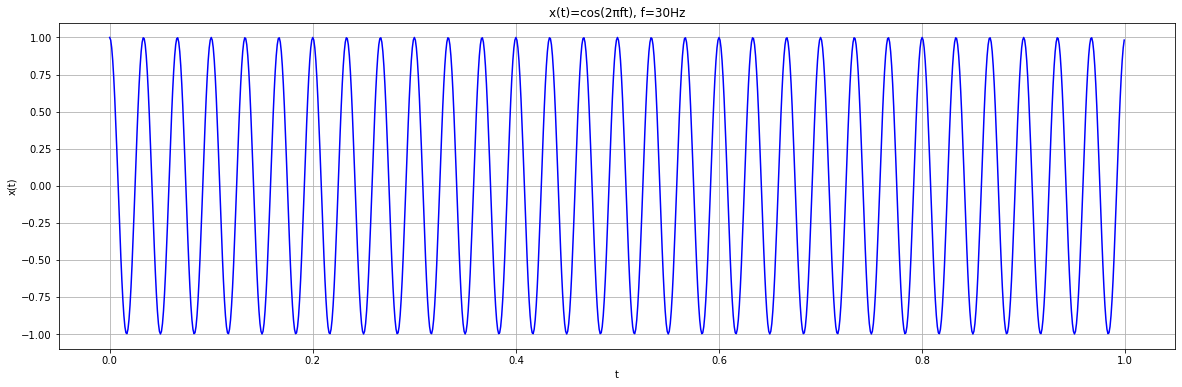

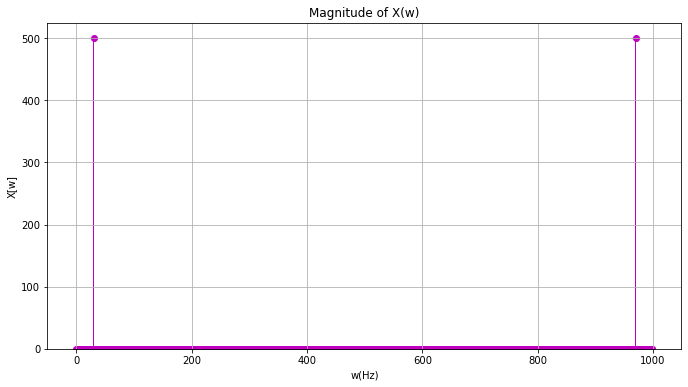

In [17]:
t=np.arange(0,1,0.001)
f=30
x=np.cos(2*np.pi*f*t)
n=np.arange(0,len(t),1)
X=DFT(x,len(x))
plt.figure(fig,figsize=(20,6))
fig+=1
plt.plot(t,x,color='b')
plt.xlabel('t')
plt.title('x(t)=cos(2πft), f=30Hz')
plt.ylabel('x(t)')
plt.grid('true')
plt.figure(fig,figsize=(25,6))
plt.subplot(1,2,1)
for i in range(len(X)):
    plt.scatter(i,abs(X[i]),color='m')
    plt.bar(i,abs(X[i]),color='m')
plt.title('Magnitude of X(w)')
plt.xlabel('w(Hz)')
plt.ylabel('X[w]')
plt.grid('true')

# Computation of Circular Convolution , DFT & IDFT

In [16]:
x=np.array([1,-3,1,5])
y=np.array([7,-7,-9,-3])
h=circon(x,y)
print('circular convolution of x=',x,' and y=',y,'is h=',h)
X=DFT(x,len(x))
Y=DFT(y,len(y))
H=DFT(h,len(y))
H2=[]
for i in range(len(X)):
    t3r=X[i].real*Y[i].real-X[i].imag*Y[i].imag
    t3i=Y[i].imag*X[i].real+Y[i].real*X[i].imag
    H2.append(complex(float(t3r),float(t3i)))
h2=IDFT(H2,len(H2))
for i in range(len(X)):
    t1r="%.2f"%X[i].real
    t2r="%.2f"%Y[i].real
    t3r="%.2f"%H[i].real
    t4r="%.2f"%h2[i].real
    t1i="%.2f"%X[i].imag
    t2i="%.2f"%Y[i].imag
    t3i="%.2f"%H[i].imag
    t4i="%.2f"%h2[i].imag
    X[i]=complex(float(t1r),float(t1i))
    Y[i]=complex(float(t2r),float(t2i))
    H[i]=complex(float(t3r),float(t3i))
    h2[i]=complex(float(t4r),float(t4i))
    
print("\nDFT of x[n]=",x,"is X[k]=",X,"\nDFT of y[n]=",y," is Y[k]=",Y,"\nDFT of h[n]=",h," is H[k]=",H)
print("\nh calculated using circular convolution x[n]*y[n] is \nh[n]=",h,"\nh calculated using IDFT of X[k]xY[k]=H[k] is\nh[n]=",h2)

circular convolution of x= [ 1 -3  1  5]  and y= [ 7 -7 -9 -3] is h= [-28, -76, 4, 52]

DFT of x[n]= [ 1 -3  1  5] is X[k]= [(4+0j), (-0+8j), -0j, -8j] 
DFT of y[n]= [ 7 -7 -9 -3]  is Y[k]= [(-12+0j), (16+4j), (8-0j), (16-4j)] 
DFT of h[n]= [-28, -76, 4, 52]  is H[k]= [(-48+0j), (-32+128j), -0j, (-32-128j)]

h calculated using circular convolution x[n]*y[n] is 
h[n]= [-28, -76, 4, 52] 
h calculated using IDFT of X[k]xY[k]=H[k] is
h[n]= [(-28+0j), (-76+0j), (4+0j), (52+0j)]


# Energy of Signal  x[n]=(3/4)^n*u[n]

In [15]:
n=np.arange(0,50,1)
x=[0.75**i for i in range(len(n))]
t1=0
t2=0
for i in x:
    t1+=i**2
print("Energy of the sequence x[n]=(3/4)^n*u[n] is =",t1)
X=DFT(x,len(x))
for i in X:
    t2+=abs(i)**2
t2=t2/len(x)
print("Energy of the sequence using DFT of x[n] is =",t2)

Energy of the sequence x[n]=(3/4)^n*u[n] is = 2.2857142857135524
Energy of the sequence using DFT of x[n] is = 2.2857142857135515
